In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# ● Load and Explore the data (3 points)
# 1. Import the required libraries and read the dataset. (1 point)
# 2. Check the first few samples, shape, info of the data and try to familiarize
# yourself with different features. (2 points)

In [128]:
df=pd.read_csv('/Users/moni/Documents/Churn_prediction/TelcomCustomer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
df.shape

(7043, 21)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [131]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [132]:
# total charges can be converted to float
#df["TotalCharges"] =df["TotalCharges"].astype('float64')
df[df['TotalCharges'] == ' '].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [133]:
# total charges has some blank space values
df.TotalCharges = df.TotalCharges.apply(lambda x: x.replace(" ",'0'))
df.TotalCharges = df.TotalCharges.astype('float64')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# senior citizen has boolean values, on an average 16.21% are senior citizens
# There are multiple Yes/No type boolean value columns which can be binary encoded

In [135]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [136]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [137]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [117]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

# The above columns can be label encoded

### ● Data Cleaning and Exploratory Data Analysis (16 points)
### 3. Check the percentage of missing values in each column of the data
### frame. Drop the missing values if there are any (2 points)
### 4. Check if there are any duplicate records in the dataset? If any drop them (2)
### 5. Drop the columns which you think redundant for the analysis (2 points)
### 6. Encode the categorical variables (2 points)
### 7. Perform a detailed univariate, bivariate, and multivariate analysis with
### appropriate plots and add detailed comments after each analysis. (8 points)

In [138]:
df=df.replace('', np.nan) 

In [139]:
# missing values check
df.isnull().sum()/len(df)*100
# NO missing values observed

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [140]:
len(df[df.duplicated()])


0

In [141]:
df.drop_duplicates(inplace=True)

In [142]:
## customerID is an identifier but is redundant for model building
df=df.drop('customerID',axis=1 )


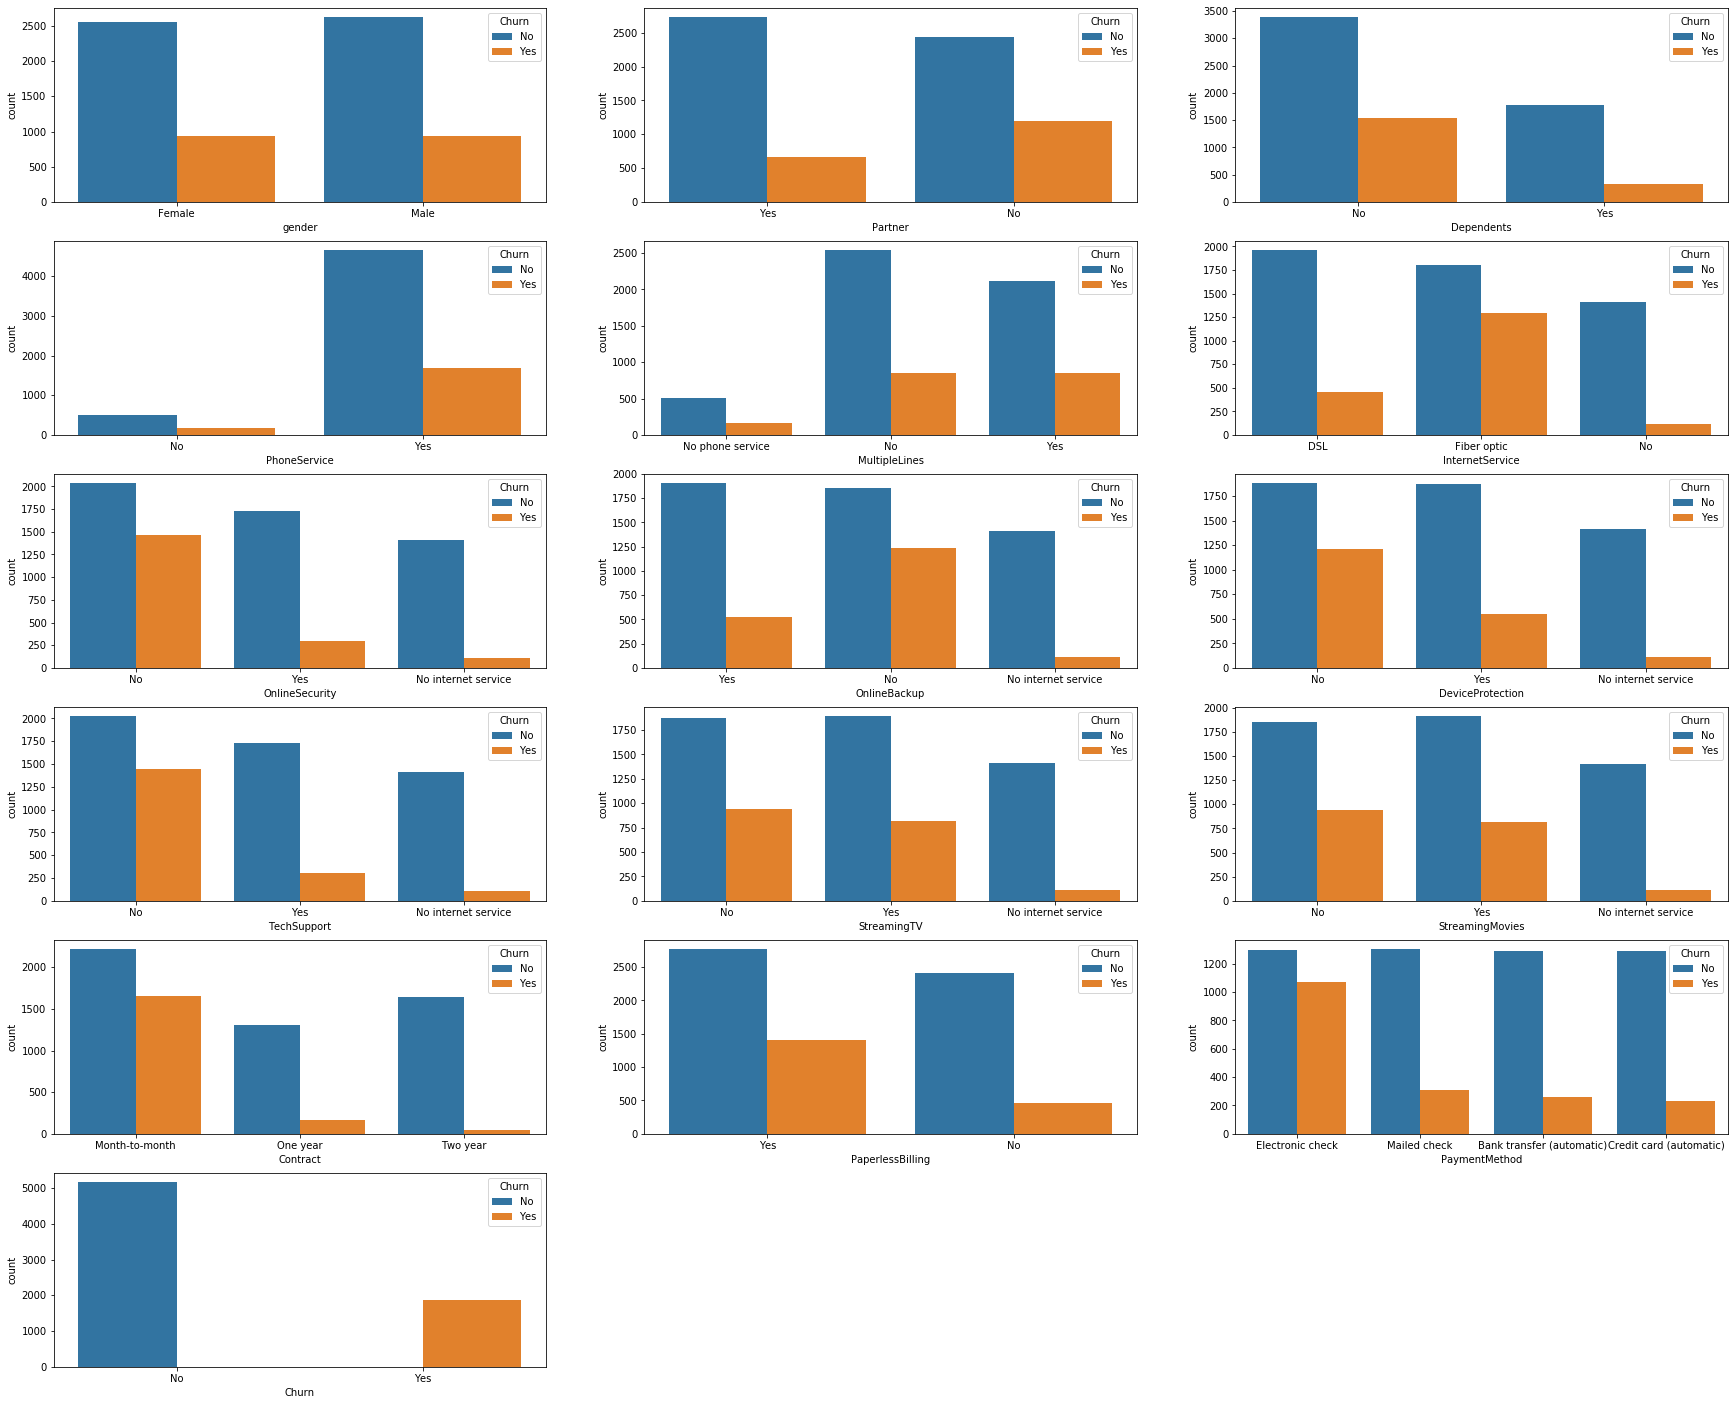

In [145]:
categorical_features=df.select_dtypes(include=[np.object])
#univariate analysis of churn
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='Churn',data=df)
    i+=1

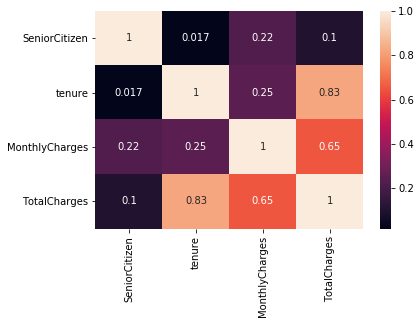

In [148]:
#bivariate analysis
sns.heatmap(df.corr(), annot=True)
## tenure and total charges are highly correlated
## monthly charges and total charges are highly correlated


## Observations

### Churn is higher for fiber optic
### Churn is higher for month-to-month subscription
### Churn is higher for Electronic check payment method
### Churn is higher for paperless billing and non partners
### tenure and total charges are highly correlated
### monthly charges and total charges are highly correlated

In [149]:
# select multiple category datatype variables
label_type_variables=[i for i in df[['MultipleLines','Contract','PaymentMethod','InternetService']] ]
le=LabelEncoder()
def encoder(df):
    for i in label_type_variables:
        q=le.fit_transform(df[i].astype('str'))
        df[i]=q
        df[i]=df[i].astype('int')
encoder(df)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,1,0,No,Yes,No,No,No,No,0,Yes,2,29.85,29.85,No
1,Male,0,No,No,34,Yes,0,0,Yes,No,Yes,No,No,No,1,No,3,56.95,1889.50,No
2,Male,0,No,No,2,Yes,0,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,Yes
3,Male,0,No,No,45,No,1,0,Yes,No,Yes,Yes,No,No,1,No,0,42.30,1840.75,No
4,Female,0,No,No,2,Yes,0,1,No,No,No,No,No,No,0,Yes,2,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,2,1,No,No,Yes,No,Yes,Yes,0,Yes,2,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,2,1,No,Yes,No,No,Yes,No,0,Yes,1,89.10,1949.40,No
7,Female,0,No,No,10,No,1,0,Yes,No,No,No,No,No,0,No,3,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,2,1,No,No,Yes,Yes,Yes,Yes,0,Yes,2,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,0,0,Yes,Yes,No,No,No,No,1,No,0,56.15,3487.95,No


In [150]:
# one hot encoding the remaining categoricals
df=pd.get_dummies(df,drop_first=True)
df.head(5)

,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,0,1,1,0,0,2,29.85,29.85,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,34,0,0,1,3,56.95,1889.50,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2,0,0,0,3,53.85,108.15,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,45,1,0,1,0,42.30,1840.75,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,2,0,1,0,2,70.70,151.65,0,0,...,0,0,0,0,0,0,0,0,1,1


### ● Data Preparation for model building (6 points)
#### 8. Store the target column (i.e. Churn) in the y variable and the rest of the
### columns in the X variable (2 points)
### 9. Split the dataset into two parts (i.e. 70% train and 30% test) (2 points)
### 10. Standardize the columns using z-score scaling approach (2 points)


In [152]:
X=df.drop('Churn_Yes',axis=1)
y=df['Churn_Yes']

In [153]:
y.value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [154]:
# split 70:30

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4930, 25) (2113, 25)
(4930,) (2113,)


In [155]:
## StandardScaler of sklearn does z score scaling

ss=StandardScaler()
X_train.iloc[:, (np.where((X_train.dtypes == np.int64) | 
                 (X_train.dtypes == np.float64)))[0]]=ss.fit_transform(X_train.iloc[:, (np.where((X_train.dtypes == np.int64) | 
                 (X_train.dtypes == np.float64)))[0]])
X_test.iloc[:, (np.where((X_test.dtypes == np.int64) | 
                 (X_test.dtypes == np.float64)))[0]]=ss.fit_transform(X_test.iloc[:, (np.where((X_test.dtypes == np.int64) | 
                 (X_test.dtypes == np.float64)))[0]])


In [156]:
X_train.head(2)

,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes
1486,-0.438147,-1.222954,-0.972569,-1.18045,-0.824707,-0.545583,-0.318564,-0.949814,0,0,...,1,0,0,0,1,0,0,0,0,1
1407,-0.438147,-0.978586,0.081457,-1.18045,1.578251,1.326833,-0.667286,-0.843347,1,0,...,0,0,0,0,1,0,0,0,1,1


In [157]:
X_test.head(2)

,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes
5710,-0.444035,1.500091,1.075422,0.173568,1.553502,0.417174,1.513551,2.371114,0,1,...,1,0,1,0,1,0,1,0,1,1
3821,2.252074,-1.310534,1.075422,0.173568,-0.836414,0.417174,0.304945,-0.998251,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Model Building and Evaluation (25 points)
#### 11. Write a function. (8 points)
#### i) Which can take the model and data as inputs.
#### ii) Fit the model with the train data.
#### iii) Make predictions on the test set.
#### iv) Returns the Accuracy Score.
#### 12. Use the function and train a Logistic regression, KNN, and Naive Bayes,
#### Decision tree, Random forest, Boosting and Stacking Classifier models and
#### make predictions on test data. (8 points)
#### 13. Display and compare all the models designed with their test
#### accuracies.(4)
#### 14. Select the final best trained model along with your detailed comments
#### for selecting this model. (3 points)
#### 15. Write your conclusion on the results.(2 points)

In [158]:
# 11.function for model fit
def fit_n_print(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    return accuracy

In [159]:
lr=LogisticRegression()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
gb=GradientBoostingClassifier()

estimators=[('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc=StackingClassifier(estimators=estimators, final_estimator=rf)

In [160]:
result=pd.DataFrame(columns=['Accuracy'])
for model,model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],['Logistic Regression','Naive Bayes','KNN','Decision tree','Random Forest','Ada Boost','Gradient Boost','Stacking']):
    result.loc[model_name]=fit_n_print(model,X_train,X_test,y_train,y_test)

In [161]:
result

,Accuracy
Logistic Regression,0.806436
Naive Bayes,0.665878
KNN,0.755324
Decision tree,0.703265
Random Forest,0.790345
Ada Boost,0.776148
Gradient Boost,0.798391
Stacking,0.758637


## Conclusion
## Logistic Regression gives the highest accuracy 80.64% amongst all the classifier models ## and hence can be possibly used as the 
## chosen classifier for predicting telecom churn on this dataset

In [ ]:
## let us also check f1 score for logistic regression

In [162]:
from sklearn.metrics import  f1_score

In [163]:
model=lr.fit(X_train,y_train)
pred=model.predict(X_test)
f1_score=f1_score(y_test,pred)

In [164]:
f1_score

0.609360076408787